<a href="https://colab.research.google.com/github/biswa2005/Housing-Price-Prediction/blob/main/House_Price_Prediction_New.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('house_prices_dataset.csv')
df.head()

,square_feet,num_rooms,age,distance_to_city(km),price
0,2248.357077,3,92,22.997972,200374.090410
1,1930.867849,2,22,13.984254,268784.847337
2,2323.844269,6,33,21.500945,315020.857676
3,2761.514928,3,63,10.343638,355111.468459
4,1882.923313,7,54,25.485200,234197.123903


In [ ]:
df.shape


(10000, 5)

In [ ]:
df.describe()

,square_feet,num_rooms,age,distance_to_city(km),price
count,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1999.147496,4.49510,49.516900,15.362148,263011.571609
std,501.021194,1.71116,28.992336,8.325101,98336.945117
min,500.000000,2.00000,0.000000,1.000161,-95613.138249
25%,1663.704735,3.00000,24.000000,8.121636,196791.510684
50%,1998.702512,4.00000,49.000000,15.403146,262497.361236
75%,2335.540444,6.00000,75.000000,22.447530,330445.581908
max,3963.118853,7.00000,99.000000,29.993892,660168.255648


In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.shape

(10000, 5)

In [ ]:
df.isna().sum()

,0
square_feet,0
num_rooms,0
age,0
distance_to_city(km),0
price,0


<Axes: xlabel='price', ylabel='Count'>

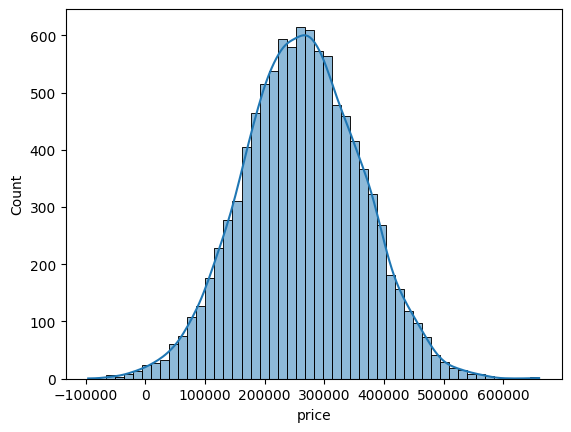

In [ ]:
sns.histplot(x = df['price'], bins=50, kde=True)

Let's visualize the distributions of the other numerical columns using box plots to check for outliers.

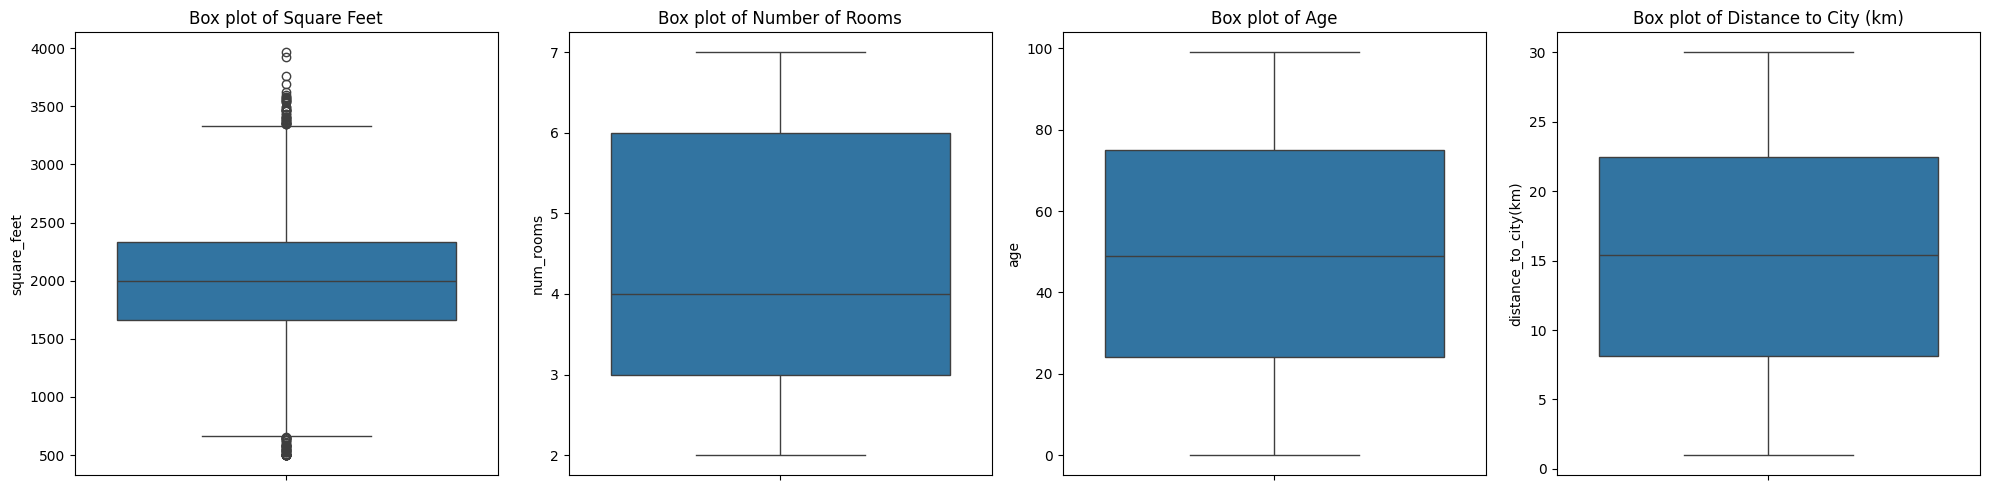

In [ ]:
fig, axes = plt.subplots(1, 4, figsize=(20, 5))

sns.boxplot(ax=axes[0], y=df['square_feet'])
axes[0].set_title('Box plot of Square Feet')

sns.boxplot(ax=axes[1], y=df['num_rooms'])
axes[1].set_title('Box plot of Number of Rooms')

sns.boxplot(ax=axes[2], y=df['age'])
axes[2].set_title('Box plot of Age')

sns.boxplot(ax=axes[3], y=df['distance_to_city(km)'])
axes[3].set_title('Box plot of Distance to City (km)')

plt.tight_layout()
plt.show()

In [ ]:
numerical_features = ['square_feet', 'num_rooms', 'age', 'distance_to_city(km)']

# Create a copy to avoid modifying the original DataFrame while iterating and dropping
df_cleaned = df.copy()

for feature in numerical_features:
    # Calculate IQR for the current feature
    Q1 = df_cleaned[feature].quantile(0.25)
    Q3 = df_cleaned[feature].quantile(0.75)
    IQR = Q3 - Q1

    # Define outlier bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Remove rows with outliers
    df_cleaned = df_cleaned[(df_cleaned[feature] >= lower_bound) & (df_cleaned[feature] <= upper_bound)]

# Update the original dataframe with the cleaned data
df = df_cleaned.copy()

# Display the updated describe and shape to see the effect
display(df.describe())
print("\nShape of the dataframe after removing outliers:", df.shape)

,square_feet,num_rooms,age,distance_to_city(km),price
count,9917.000000,9917.000000,9917.000000,9917.000000,9917.000000
mean,1999.350690,4.494605,49.480992,15.368897,263039.765658
std,484.751563,1.709693,29.022754,8.323347,96359.863024
min,662.716436,2.000000,0.000000,1.000161,-63106.881799
25%,1668.417705,3.000000,24.000000,8.128450,197124.712020
50%,1998.815542,4.000000,49.000000,15.409774,262515.266341
75%,2332.684468,6.000000,75.000000,22.442767,329762.990683
max,3333.452611,7.000000,99.000000,29.993892,581879.117200



Shape of the dataframe after removing outliers: (9917, 5)


In [ ]:
# Remove rows where 'price' is less than 0
df = df[df['price'] >= 0]

# Display the updated describe and shape to see the effect
display(df.describe())
print("\nShape of the dataframe after removing negative prices:", df.shape)

,square_feet,num_rooms,age,distance_to_city(km),price
count,9891.000000,9891.000000,9891.000000,9891.000000,9891.000000
mean,2001.970461,4.499242,49.418259,15.340948,263787.431434
std,482.594396,1.708503,29.011529,8.313718,95370.647576
min,662.716436,2.000000,0.000000,1.000161,1059.396373
25%,1671.604094,3.000000,24.000000,8.110307,197883.474662
50%,2000.662844,5.000000,49.000000,15.384422,262861.552739
75%,2333.423339,6.000000,75.000000,22.384720,330048.767490
max,3333.452611,7.000000,99.000000,29.993892,581879.117200



Shape of the dataframe after removing negative prices: (9891, 5)


<Axes: xlabel='price', ylabel='Count'>

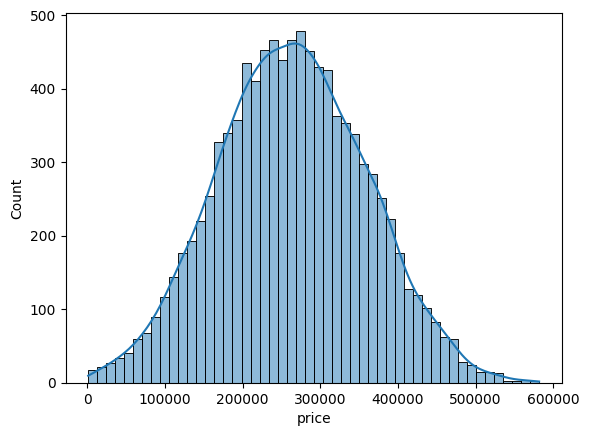

In [ ]:
sns.histplot(x = df['price'], bins=50, kde=True)

In [ ]:
from sklearn.preprocessing import StandardScaler

# Select the numerical features to scale
numerical_features = ['square_feet', 'num_rooms', 'age', 'distance_to_city(km)']

# Initialize the StandardScaler
scaler = StandardScaler()

# Apply standard scaling to the selected features
df[numerical_features] = scaler.fit_transform(df[numerical_features])

# Display the head of the dataframe to see the scaled features
display(df.head())

,square_feet,num_rooms,age,distance_to_city(km),price
0,0.510572,-0.877562,1.467827,0.921057,200374.090410
1,-0.147342,-1.462899,-0.945129,-0.163196,268784.847337
2,0.666999,0.878450,-0.565950,0.740981,315020.857676
3,1.573957,-0.877562,0.468173,-0.601122,355111.468459
4,-0.246694,1.463787,0.157936,1.220244,234197.123903


In [ ]:
from sklearn.model_selection import train_test_split

# Define features (X) and target (y)
X = df.drop('price', axis=1)
y = df['price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [ ]:
from sklearn.metrics import r2_score

In [ ]:
r2_score(y_test, y_pred)

0.9554524262111881

In [ ]:
# Calculate the number of observations (n) and features (p)
n = X_test.shape[0]
p = X_test.shape[1]

# Get the R-squared value (assuming it's stored in a variable named r2)
# If not, you would need to calculate it first: r2 = r2_score(y_test, y_pred)
r2 = r2_score(y_test, y_pred)


# Calculate the adjusted R-squared
adjusted_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)

print("Adjusted R-squared:", adjusted_r2)

Adjusted R-squared: 0.9553621575712918


In [ ]:
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score

### K-Nearest Neighbors Regressor

In [ ]:
# Initialize and train the KNN Regressor model
knn_model = KNeighborsRegressor(n_neighbors=8) # You can experiment with different values for n_neighbors
knn_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_knn = knn_model.predict(X_test)

# Evaluate the KNN Regressor model
mse_knn = mean_squared_error(y_test, y_pred_knn)
r2_knn = r2_score(y_test, y_pred_knn)

print(f"KNN Mean Squared Error: {mse_knn}")
print(f"KNN R-squared: {r2_knn}")

KNN Mean Squared Error: 525601044.21814436
KNN R-squared: 0.9440682456285605
